<a href="https://colab.research.google.com/github/yash11103/AIML-course-/blob/main/ym_clickthroughratemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [ ]:
df.sample(12)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
106,72.23,25,46557.92,241.03,Focused 24hour implementation,Marcushaven,1,Bhutan,2016-07-05 17:17:49,0
244,70.44,24,65280.16,178.75,Polarized attitude-oriented superstructure,New Sonialand,1,Algeria,2016-06-06 21:26:51,0
348,76.20,37,75044.35,178.51,Multi-layered fresh-thinking process improvement,Karenton,0,Barbados,2016-02-29 19:26:35,0
637,91.10,40,55499.69,198.13,Secured intermediate approach,Michaelmouth,1,Bolivia,2016-03-07 22:51:00,0
745,57.99,50,62466.10,124.58,Innovative homogeneous alliance,New Angelview,0,Costa Rica,2016-02-12 08:46:15,1
898,55.46,37,42078.89,108.10,Exclusive systematic algorithm,Chrismouth,0,Taiwan,2016-02-21 23:07:11,1
184,85.56,29,53673.08,210.46,Advanced modular Local Area Network,South Denisefurt,0,Samoa,2016-06-05 13:16:24,0
594,49.84,38,67781.31,135.24,Phased hybrid superstructure,Jenniferhaven,1,United Arab Emirates,2016-05-18 03:19:03,1
611,39.50,31,49911.25,148.19,Operative multi-tasking Graphic Interface,West Brad,1,Micronesia,2016-01-28 16:42:36,1
317,73.38,25,53058.91,236.19,Horizontal transitional challenge,South Corey,1,French Southern Territories,2016-04-21 09:30:35,0


In [ ]:
a = df.shape
print(f'Rows: {a[0]}')
print(f'Columns: {a[1]}')

Rows: 1000
Columns: 10


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import plotly.express as px

In [ ]:
colList = df.columns
colList

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

Here "CLICKED ON AD" is the target column we need for training the model

In [ ]:
for x in colList:
  if df[x].dtype != 'object':
    fig = px.box(df[x],title =f'Box Plot of {x} column')
    fig.show()

In [ ]:
outCols = ['Area Income']

In [ ]:
for x in outCols:
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)
  IQR = Q3 - Q1

  LF = Q1 - (1.5*IQR)
  UF = Q3 + (1.5*IQR)

  # Keep the values in between UF and LF
  df = df[(df[x]>=LF) & (df[x]<=UF)]


In [ ]:
for x in colList:
  if df[x].dtype != 'object':
    fig = px.box(df[x],title =f'Box Plot of {x} column')
    fig.show()

In [ ]:
df.shape

(991, 10)

male ratio of ads clicked

<Axes: xlabel='Male', ylabel='Clicked on Ad'>

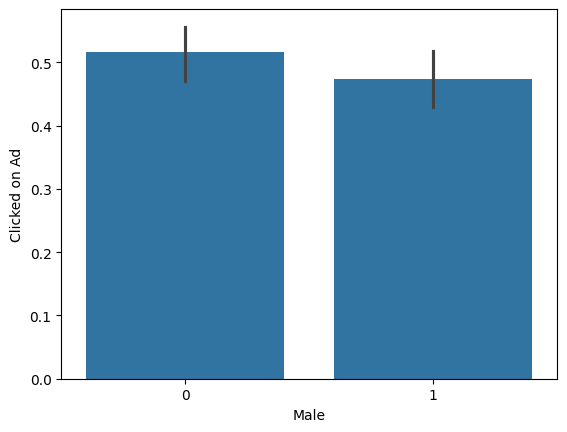

In [ ]:
# checking male female click to ad ratio
sns.barplot(data=df, x='Male', y='Clicked on Ad')

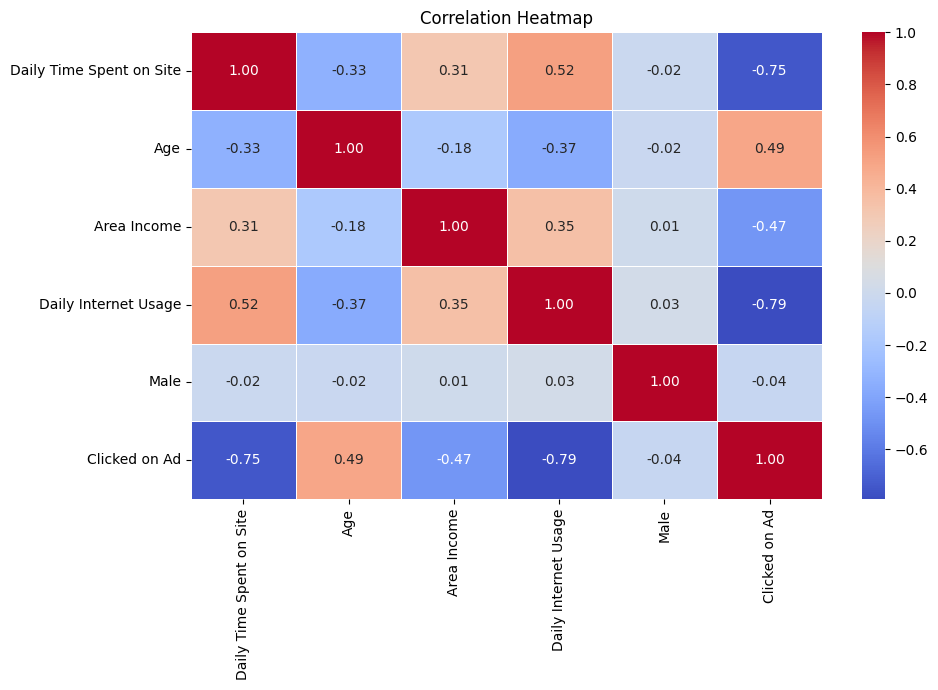

In [ ]:
# print co-relation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='0.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

encoding and model building

In [ ]:
catCol = []
for x in df.columns:
  if df[x].dtype =='object' and x !='Clicked on Ad':
    catCol.append(x)

In [ ]:
catCol

['Ad Topic Line', 'City', 'Country', 'Timestamp']

now encoding the object data type into numerical data type

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labelMap = {}
for x in catCol:
  df[x] = le.fit_transform(df[x])
  labelMap[x] = dict(zip(le.classes_, le.transform(le.classes_)))
  print(f'Mapped for {x}: {labelMap[x]}')

Mapped for Ad Topic Line: {'Adaptive 24hour Graphic Interface': np.int64(0), 'Adaptive asynchronous attitude': np.int64(1), 'Adaptive context-sensitive application': np.int64(2), 'Adaptive contextually-based methodology': np.int64(3), 'Adaptive demand-driven knowledgebase': np.int64(4), 'Adaptive uniform capability': np.int64(5), 'Advanced 24/7 productivity': np.int64(6), 'Advanced 5thgeneration capability': np.int64(7), 'Advanced didactic conglomeration': np.int64(8), 'Advanced disintermediate data-warehouse': np.int64(9), 'Advanced exuding conglomeration': np.int64(10), 'Advanced full-range migration': np.int64(11), 'Advanced heuristic firmware': np.int64(12), 'Advanced local task-force': np.int64(13), 'Advanced modular Local Area Network': np.int64(14), 'Advanced systemic productivity': np.int64(15), 'Advanced web-enabled standardization': np.int64(16), 'Ameliorated actuating workforce': np.int64(17), 'Ameliorated bandwidth-monitored contingency': np.int64(18), 'Ameliorated client-d

In [ ]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,90,952,0,215,438,0
1,80.23,31,68441.85,193.77,460,895,1,147,473,0
2,69.47,26,59785.94,236.50,561,111,0,184,366,0
3,74.15,29,54806.18,245.89,894,931,1,103,56,0
4,68.37,35,73889.99,225.58,760,797,0,96,761,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,342,126,1,116,202,1
996,51.30,45,67782.17,134.42,356,484,1,26,565,1
997,51.63,51,42415.72,120.37,260,790,1,140,150,1
998,55.55,19,41920.79,187.95,635,927,0,85,421,0


Splitting the Data Into Dependent and Independent Columns

In [ ]:
#we have excluded Ad Topic Line, city, country and timestamp from the model
x = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [ ]:
y

,Clicked on Ad
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,0


Train Test and Splitting the model


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state = 42)

In [ ]:
x_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
945,89.80,36,57330.43,198.24,0
575,48.86,54,53188.69,134.46,0
933,36.73,34,46737.34,149.79,1
405,81.58,41,55479.62,248.16,0
529,89.37,34,42760.22,162.03,1
...,...,...,...,...,...
106,72.23,25,46557.92,241.03,1
271,73.04,37,73687.50,221.79,1
868,67.71,25,63430.33,225.76,1
437,76.24,27,63976.44,214.42,0


In [ ]:
x_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
214,81.98,40,65461.92,229.22,0
332,56.30,49,67430.96,135.24,1
503,58.21,37,47575.44,105.94,0
310,76.56,34,70179.11,221.53,1
88,57.70,34,42696.67,109.07,0
...,...,...,...,...,...
430,88.72,32,43870.51,211.87,1
701,69.77,54,57667.99,132.27,0
989,70.96,31,55187.85,256.40,0
910,42.84,52,27073.27,182.20,1


implementing the model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
y_test

,Clicked on Ad
214,0
332,1
503,1
310,0
88,1
...,...
430,0
701,1
989,0
910,1


Evaluation of model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
accuracy_score(y_test,y_pred)
#the accuracy is 92% of model

0.9161073825503355

In [ ]:
confusion_matrix(y_test,y_pred)

array([[147,   7],
       [ 18, 126]])

In [ ]:
precision_score(y_test,y_pred)

0.9473684210526315

In [ ]:
recall_score(y_test,y_pred)

0.875

In [ ]:
f1_score(y_test,y_pred)

0.9097472924187726

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       154
           1       0.95      0.88      0.91       144

    accuracy                           0.92       298
   macro avg       0.92      0.91      0.92       298
weighted avg       0.92      0.92      0.92       298



sigmoid

In [ ]:
def sigmoid(x):
  result = 1/(1+np.exp(-x))
  return result


In [ ]:
sigmoid(-3)

np.float64(0.04742587317756678)

In [ ]:
y_score = model.predict_proba(x_test)[:,1]

In [ ]:
y_score

array([0.25419611, 0.99077623, 0.93558081, 0.09933892, 0.87919409,
       0.08330376, 0.25919932, 0.96525879, 0.97940763, 0.99419812,
       0.81531112, 0.60400308, 0.68773017, 0.92498036, 0.0806104 ,
       0.91609819, 0.14144452, 0.96656394, 0.89094092, 0.02744602,
       0.03912788, 0.12173996, 0.90589955, 0.0247218 , 0.10032282,
       0.84999426, 0.0437977 , 0.48063879, 0.0176114 , 0.11425941,
       0.0382482 , 0.31595371, 0.03298864, 0.96644968, 0.30267576,
       0.18165676, 0.01715058, 0.73183885, 0.01357671, 0.0175809 ,
       0.98019848, 0.13836928, 0.10560856, 0.02201569, 0.99727894,
       0.13164853, 0.77422868, 0.55033886, 0.03182994, 0.98675892,
       0.07637647, 0.17395609, 0.05426577, 0.04837484, 0.25634949,
       0.9085192 , 0.97820189, 0.62170756, 0.02862207, 0.90623548,
       0.9673906 , 0.16238591, 0.99903827, 0.92084928, 0.98142262,
       0.96539523, 0.3751673 , 0.87989954, 0.01649758, 0.95516728,
       0.74366815, 0.59465915, 0.14847572, 0.95667435, 0.55351

In [ ]:
len(y_score)

298

In [ ]:
sorInd = np.argmax(y_score)
sorInd

np.int64(289)

In [ ]:
y_score[sorInd]

np.float64(0.99940333943832)

In [ ]:
sortLabel = y_test.iloc[sorInd]
sortLabel

np.int64(1)

In [ ]:
sortScore = y_score[sorInd]
sortScore

np.float64(0.99940333943832)

In [ ]:
x_values = np.linspace(-10,10,100)
y_sigmoid = sigmoid(x_values)

In [ ]:
y_sigmoid

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

In [ ]:
y_score

array([0.25419611, 0.99077623, 0.93558081, 0.09933892, 0.87919409,
       0.08330376, 0.25919932, 0.96525879, 0.97940763, 0.99419812,
       0.81531112, 0.60400308, 0.68773017, 0.92498036, 0.0806104 ,
       0.91609819, 0.14144452, 0.96656394, 0.89094092, 0.02744602,
       0.03912788, 0.12173996, 0.90589955, 0.0247218 , 0.10032282,
       0.84999426, 0.0437977 , 0.48063879, 0.0176114 , 0.11425941,
       0.0382482 , 0.31595371, 0.03298864, 0.96644968, 0.30267576,
       0.18165676, 0.01715058, 0.73183885, 0.01357671, 0.0175809 ,
       0.98019848, 0.13836928, 0.10560856, 0.02201569, 0.99727894,
       0.13164853, 0.77422868, 0.55033886, 0.03182994, 0.98675892,
       0.07637647, 0.17395609, 0.05426577, 0.04837484, 0.25634949,
       0.9085192 , 0.97820189, 0.62170756, 0.02862207, 0.90623548,
       0.9673906 , 0.16238591, 0.99903827, 0.92084928, 0.98142262,
       0.96539523, 0.3751673 , 0.87989954, 0.01649758, 0.95516728,
       0.74366815, 0.59465915, 0.14847572, 0.95667435, 0.55351

In [ ]:
ind = np.where(y_test)

In [ ]:
ind


(array([  1,   2,   4,   6,   7,   8,   9,  10,  12,  13,  15,  17,  18,
         22,  27,  31,  33,  37,  40,  44,  47,  49,  54,  55,  56,  57,
         59,  60,  61,  62,  63,  64,  65,  67,  69,  70,  71,  73,  75,
         81,  84,  85,  87,  92,  94,  98, 100, 104, 105, 106, 107, 108,
        111, 113, 114, 115, 118, 122, 123, 125, 126, 128, 129, 131, 132,
        133, 138, 139, 141, 146, 147, 150, 151, 152, 155, 156, 158, 159,
        160, 169, 170, 171, 172, 173, 177, 179, 181, 184, 185, 186, 187,
        188, 190, 191, 196, 197, 199, 201, 203, 204, 205, 208, 209, 212,
        214, 215, 217, 219, 226, 227, 228, 229, 230, 231, 237, 238, 240,
        243, 246, 247, 249, 251, 253, 256, 261, 262, 263, 264, 265, 269,
        272, 273, 274, 279, 281, 282, 284, 285, 287, 289, 290, 291, 294,
        296]),)

In [ ]:
sortLabel = y_test.iloc[:]
sortLabel

,Clicked on Ad
214,0
332,1
503,1
310,0
88,1
...,...
430,0
701,1
989,0
910,1


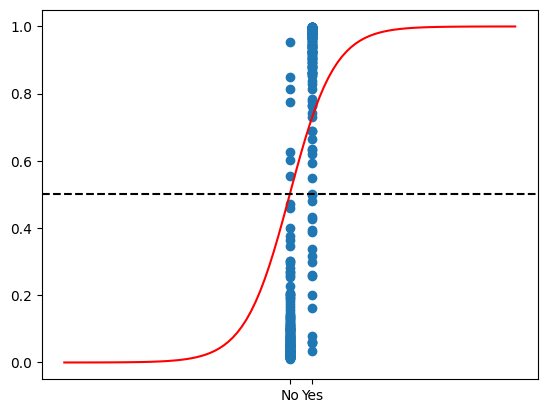

In [ ]:
plt.plot(x_values,y_sigmoid,color='red')
plt.axhline(y=0.5, color ='black',linestyle='--')
plt.xticks([0, 1], ['No', 'Yes'])
plt.scatter(sortLabel,y_score)
plt.show()